# Q1. Your views about the problem statement?

As a Machine Learning Expert at 'The Daily Buzz' after carefully reading the Problem statement and analyzing the given Dataset,
It seems a complicated Classfication Problem with Multiple Similar and correlated parameters. Although creating Classification model is not tough but creating a good dataset for the model is the Main Task. Some columns should be removed , Some columns should be Combined while some column should be transformed for our model to work smoothly and efficiently.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn 
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression
from sklearn.model_selection import train_test_split,validation_curve, GridSearchCV
from sklearn.metrics import r2_score,f1_score,accuracy_score,confusion_matrix, precision_score, recall_score,roc_auc_score,mean_squared_error
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from IPython.display import Image
import pydotplus
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import xgboost as xgb

In [2]:
df = pd.read_excel('sydney_rain prediction.xlsx')        # Importing data through main file as a dataframe (df)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


# changing seasonal Data.

In [3]:
df['season'] = df['Date'].dt.month.apply(lambda x: 'Spring' if 3 <= x <= 5 else   # Transforming date Data into seasonal data.
                                                   'Summer' if 6 <= x <= 8 else
                                                   'Fall' if 9 <= x <= 11 else
                                                   'Winter')
del df['Date']                                                                    # Deleting Date column

In [4]:
del df['Location']                                                                # Deleting Location Column since it is useless.

df.info()                                                                         # Checking for null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
 15  season        3337 non-null   object 
dtypes: float64(13), object(3)
memory usage: 417.2+ KB


# Imputing Missing values into Dataset.

In [5]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())                 # Imputing null values with mean values of the column
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(method='bfill')
df['Humidity9am'] = df['Humidity9am'].fillna(method='bfill')              # Imputing null values with backward fill for some variation.
df['Humidity3pm'] = df['Humidity3pm'].fillna(method='bfill')
df['Pressure9am'] = df['Pressure9am'].fillna(method='bfill')
df['Pressure3pm'] = df['Pressure3pm'].fillna(method='bfill')
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode())          # Imputing categorical values with mode values of column
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode())



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
 15  season        3337 non-null   object 
dtypes: float64(13), object(3)
memory usage: 417.2+ KB


In [7]:
df.dropna(subset=['RainToday'], inplace=True)                   # Dropping some rows because we were not able to impute 
df                                                              # missing values for them

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,Winter
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,Winter
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,Winter
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,Winter
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,Summer
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,Summer
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,Summer
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No,Summer


# Creating Dummy Variables for categorical Data.

In [8]:
encoded_role1 = pd.get_dummies(df['RainToday'])               # Creating dummy variables for RainToday and saving it separately 
df = pd.concat([df, encoded_role1['Yes']], axis=1)            # Concatinating dummy variables "Yes" for raintoday in original df
del df['RainToday']                                           # Deleting orignal categorical column
df = df.rename(columns={'Yes': 'RainToday'})                  # Renaming dummy column as the orignal column.

                                                                
encoded_role2 = pd.get_dummies(df['RainTomorrow'])                                                                              
df = pd.concat([df, encoded_role2['Yes']], axis=1)
del df['RainTomorrow']                            
df = df.rename(columns={'Yes': 'RainTomorrow'})

encoded_role3 = pd.get_dummies(df['season'])
df = pd.concat([df, encoded_role3], axis=1)
del df['season']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3331 entries, 0 to 3336
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3331 non-null   float64
 1   MaxTemp       3331 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3331 non-null   float64
 4   Sunshine      3331 non-null   float64
 5   Humidity9am   3331 non-null   float64
 6   Humidity3pm   3331 non-null   float64
 7   Pressure9am   3331 non-null   float64
 8   Pressure3pm   3331 non-null   float64
 9   Cloud9am      3331 non-null   float64
 10  Cloud3pm      3331 non-null   float64
 11  Temp9am       3331 non-null   float64
 12  Temp3pm       3331 non-null   float64
 13  RainToday     3331 non-null   uint8  
 14  RainTomorrow  3331 non-null   uint8  
 15  Fall          3331 non-null   uint8  
 16  Spring        3331 non-null   uint8  
 17  Summer        3331 non-null   uint8  
 18  Winter        3331 non-null 

# EDD Analysis.

In [10]:
df.describe()                                                              # Analyzing the EDD.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Fall,Spring,Summer,Winter
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863613,22.997029,3.330231,5.185428,7.163104,68.217352,54.706995,1018.374212,1016.055356,4.182587,4.218557,17.814674,21.528680,0.259982,0.259081,0.242570,0.267187,0.255479,0.234764
std,4.552071,4.488817,9.895172,2.755999,3.819129,15.079077,16.297718,7.034497,7.052634,2.506658,2.411407,4.891371,4.299054,0.438690,0.438196,0.428701,0.442557,0.436196,0.423915
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.200000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.600000,1016.300000,4.181523,4.218660,18.100000,21.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.200000,1020.900000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Combining Similar data columns.

In [11]:
df['Humidity'] = df[['Humidity9am', 'Humidity3pm']].mean(axis=1)          # Combining 2 columns into 1 single column.
del df['Humidity9am']                                                     # Deleting the individual columns.
del df['Humidity3pm']

df['Pressure'] = df[['Pressure9am', 'Pressure3pm']].mean(axis=1)
del df['Pressure9am']
del df['Pressure3pm']

df['Cloud'] = df[['Cloud9am', 'Cloud3pm']].mean(axis=1)
del df['Cloud9am']
del df['Cloud3pm']

df['Temp'] = df[['Temp9am', 'Temp3pm']].mean(axis=1)
del df['Temp9am']
del df['Temp3pm']

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Fall,Spring,Summer,Winter,Humidity,Pressure,Cloud,Temp
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863613,22.997029,3.330231,5.185428,7.163104,0.259982,0.259081,0.242570,0.267187,0.255479,0.234764,61.462174,1017.214784,4.200572,19.671677
std,4.552071,4.488817,9.895172,2.755999,3.819129,0.438690,0.438196,0.428701,0.442557,0.436196,0.423915,14.283495,6.974186,2.206184,4.394350
min,4.300000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.500000,988.850000,0.000000,9.300000
25%,11.000000,19.600000,0.000000,3.200000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1012.625000,2.500000,16.150000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1017.400000,4.200091,19.700000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,71.000000,1022.050000,6.000000,23.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,1037.400000,8.000000,37.300000


## Dealing with Outliers.

In [12]:
uv_Rainfall = np.percentile(df.Rainfall, [97])[0]                 # We took the 97th percentile because there was huge difference
df.loc[df['Rainfall'] > uv_Rainfall, 'Rainfall'] = uv_Rainfall    # between the 99th percentile and the max. So we will try to pick
                                                                  # a values which can be considered and not so out of range.
uv_MaxTemp = np.percentile(df.MaxTemp, [99])[0]
df.loc[df['MaxTemp'] > uv_MaxTemp, 'MaxTemp'] = uv_MaxTemp

uv_Temp = np.percentile(df.Temp, [99])[0]
df.loc[df['Temp'] > uv_Temp, 'Temp'] = uv_Temp

uv_Humidity = np.percentile(df.Humidity, [99])[0]
df.loc[df['Humidity'] > uv_Humidity, 'Humidity'] = uv_Humidity

uv_Evaporation = np.percentile(df.Evaporation, [99])[0]
df.loc[df['Evaporation'] > uv_Evaporation, 'Evaporation'] = uv_Evaporation

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Fall,Spring,Summer,Winter,Humidity,Pressure,Cloud,Temp
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863613,22.970130,2.726148,5.173419,7.163104,0.259982,0.259081,0.242570,0.267187,0.255479,0.234764,61.444461,1017.214784,4.200572,19.649894
std,4.552071,4.399732,6.453836,2.717552,3.819129,0.438690,0.438196,0.428701,0.442557,0.436196,0.423915,14.244510,6.974186,2.206184,4.333022
min,4.300000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.500000,988.850000,0.000000,9.300000
25%,11.000000,19.600000,0.000000,3.200000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1012.625000,2.500000,16.150000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1017.400000,4.200091,19.700000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,71.000000,1022.050000,6.000000,23.000000
max,27.600000,35.400000,28.420000,12.800000,13.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91.500000,1037.400000,8.000000,29.985000


## Checking for Duplicate Data.

In [13]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# Plotting Jointplots to get any Information out of Data.

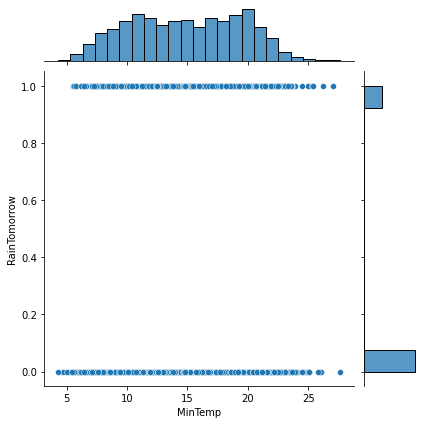

In [14]:
sns.jointplot(x='MinTemp', y='RainTomorrow', data=df)

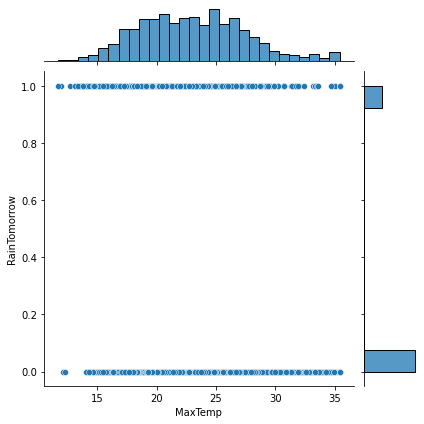

In [15]:
sns.jointplot(x='MaxTemp', y='RainTomorrow', data=df)

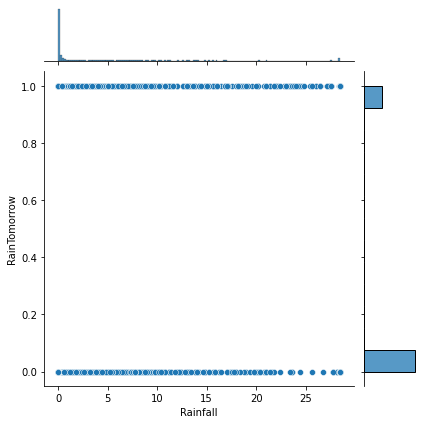

In [16]:
sns.jointplot(x='Rainfall', y='RainTomorrow', data=df)          # Bernoulli distribution


### The Rainfall vs RainTommorror plot depicts log graph so we tried to apply value trandformation on the data and replot is, and it seems not good but sure better than before.

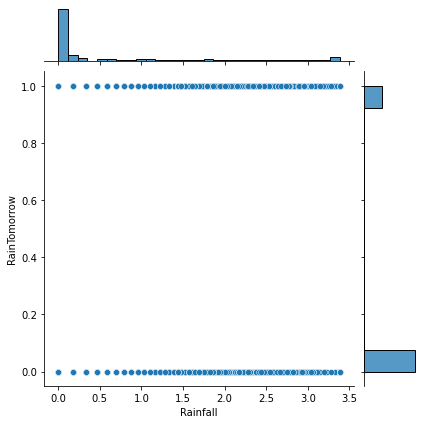

In [17]:
df['Rainfall'] = np.log(1+df['Rainfall'])
sns.jointplot(x='Rainfall', y='RainTomorrow', data=df) 

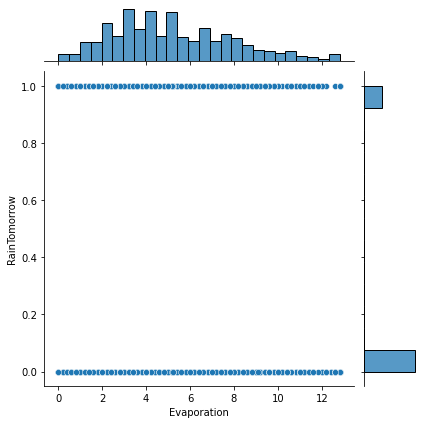

In [18]:
sns.jointplot(x='Evaporation', y='RainTomorrow', data=df)

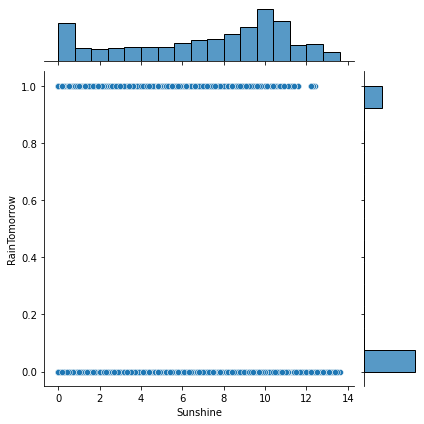

In [19]:
sns.jointplot(x='Sunshine', y='RainTomorrow', data=df)

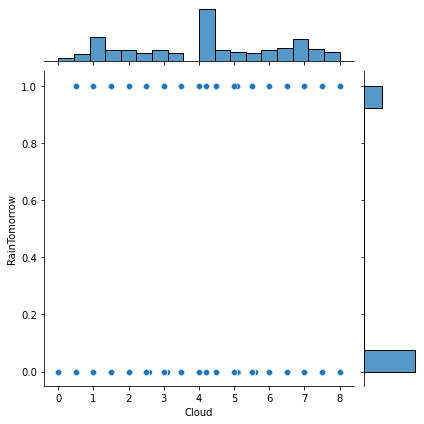

In [20]:
sns.jointplot(x='Cloud', y='RainTomorrow', data=df)

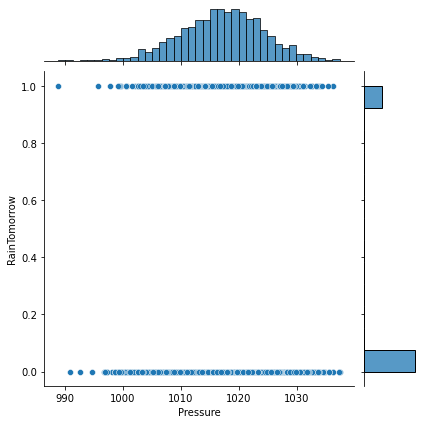

In [21]:
sns.jointplot(x='Pressure', y='RainTomorrow', data=df)

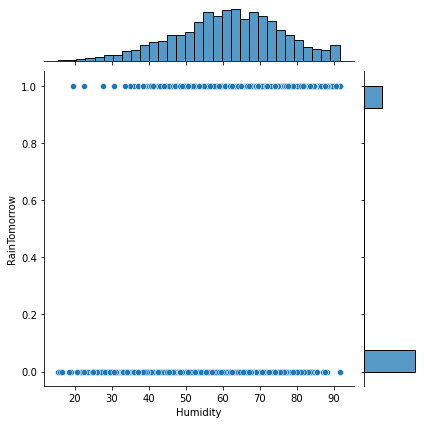

In [22]:
sns.jointplot(x='Humidity', y='RainTomorrow', data=df)

# Analyzing Correlation Matrix.

In [23]:
df.corr()                                               # For finding and multi-collinearity and Relations within data variables

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Fall,Spring,Summer,Winter,Humidity,Pressure,Cloud,Temp
MinTemp,1.000000,0.775809,0.026709,0.569926,-0.064538,0.018899,0.079355,0.003396,0.078356,-0.657520,0.591331,0.184130,-0.378287,0.224058,0.893607
MaxTemp,0.775809,1.000000,-0.188149,0.511317,0.326343,-0.188234,-0.153538,0.057815,0.074427,-0.586689,0.467516,-0.175780,-0.408170,-0.105743,0.947209
Rainfall,0.026709,-0.188149,1.000000,-0.216435,-0.388632,0.898120,0.369775,-0.048133,0.037961,0.003052,0.005905,0.441815,0.014101,0.335541,-0.131384
Evaporation,0.569926,0.511317,-0.216435,1.000000,0.175147,-0.230622,-0.064315,0.200048,-0.168642,-0.439210,0.425685,-0.265320,-0.326039,-0.042527,0.571104
Sunshine,-0.064538,0.326343,-0.388632,0.175147,1.000000,-0.365334,-0.524034,0.101156,-0.050346,-0.084815,0.037534,-0.589113,-0.071390,-0.745684,0.231300
RainToday,0.018899,-0.188234,0.898120,-0.230622,-0.365334,1.000000,0.341547,-0.033637,0.021061,0.005893,0.005965,0.404422,0.027907,0.322293,-0.132789
RainTomorrow,0.079355,-0.153538,0.369775,-0.064315,-0.524034,0.341547,1.000000,-0.029314,0.020777,0.000820,0.007111,0.443599,-0.012161,0.413669,-0.096016
Fall,0.003396,0.057815,-0.048133,0.200048,0.101156,-0.033637,-0.029314,1.000000,-0.341710,-0.331502,-0.313448,-0.179744,-0.065553,-0.028056,0.068899
Spring,0.078356,0.074427,0.037961,-0.168642,-0.050346,0.021061,0.020777,-0.341710,1.000000,-0.353712,-0.334449,0.126233,0.132786,-0.003415,0.059967
Summer,-0.657520,-0.586689,0.003052,-0.439210,-0.084815,0.005893,0.000820,-0.331502,-0.353712,1.000000,-0.324457,-0.041165,0.207182,-0.063808,-0.657413


### MaxTemp --- Temp : 0.947209 
They both have really high correlation, we should get rid of one to avoid any multicollinearity. We will Remove Temp as it was just mean of of Temp9am and Temp3pm, Whereas MaxTemp makes more real life sense and Interpretation.

In [24]:
del df['Temp']

### Splitting Data into Independent and Dependent  Data

In [26]:
X = df.loc[:, df.columns != 'RainTomorrow']                 # Independent Variables.
Y = df['RainTomorrow']                                      # Dependent variables.

### Splitting Data into Training and Testing

In [27]:
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0) # Splitting training and testing into
x_train.shape, x_test.shape, y_train.shape, y_test.shape                                  # 80:20 ratio.

((2331, 13), (1000, 13), (2331,), (1000,))

### Data Scaling.

In [28]:
scaler = preprocessing.StandardScaler().fit(x_train)        # Transforming the data into a same range so as to get better 
x_train = scaler.transform(x_train)                         # calculations and effective Results.
x_test = scaler.transform(x_test)

# Q3. What were the available ML model options you had to perform this task?

Now as we are done with the preprocessing and splititng of data into training and testing set, It is time to choose a model which we think will help us predict future Rainfall accurately and Precisely.
1. First thing to notice is that it is a Discrete value (1 or 0 ) Prediction task that is it's a Classification Problem, so we have to try and use only Classification models like Logistic Regression, Decision Tree etc and not the Regression Models like Linear Regression which can be quite confusing sometimes.
2. Here is a list of Models which I thought I can experiment with to find which model performs at what level for my proble,
* Logistic Regression with multiple Variables.
* KNN for Classfication.
* Decision Tree Classification.

# Logistic Regression Model.

In [52]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

y_train_pred = LR_model.predict(x_train)                    # Predicting on Training Data
y_test_pred = LR_model.predict(x_test)                      # Predicting on Test Data

train_acc = accuracy_score(y_train, y_train_pred)           # Calculating MSE for Training Data
test_acc  = accuracy_score(y_test, y_test_pred)             # Calculating MSE for Testing Data

train_rs = recall_score(y_train, y_train_pred)              # Calculating R2_score for Training Data
test_rs  = recall_score(y_test, y_test_pred)                # Calculating R2_score for Testing Data

train_f1 = f1_score(y_train, y_train_pred)                  # Calculating R2_score for Training Data
test_f1  = f1_score(y_test, y_test_pred)                    # Calculating R2_score for Testing Data

print("Train Accuracy : ", train_acc, " | Train Recall : ", train_rs, " | Train F1_score : ", train_f1)
print("Test Accuracy  : " , test_acc,  "              | Test Recall  : ", test_rs, " | Test F1_score  : ", test_f1)

print("Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))

Train Accuracy :  0.8292578292578292  | Train Recall :  0.5799676898222941  | Train F1_score :  0.6433691756272402
Test Accuracy  :  0.807               | Test Recall  :  0.5327868852459017  | Test F1_score  :  0.5739514348785874
Confusion Matrix :  [[677  79]
 [114 130]]


# KNN Model.

In [53]:
KNN_model = KNeighborsClassifier()

param_grid = {"n_neighbors" : [3,4,5,6,7,8],                     # Creating a parameter Grid for hyper tuning the parameters.
              "weights" : ['uniform','distance'],
              "p" : [1,2,3],
              "algorithm" : ['auto','ball_tree','kd_tree','brute']
             }
grid_search = GridSearchCV(KNN_model, param_grid, cv=5, scoring='f1',n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_, "\n")      #  Getting the best parameters on the basis of 'f1_score'
                                                                 


optimised_KNN_model = KNeighborsClassifier(n_neighbors=6, p =1, weights='distance',n_jobs=-1,algorithm ='auto')
optimised_KNN_model.fit(x_train, y_train)                       # Training the new optimised model for prediction.


y_train_pred = optimised_KNN_model.predict(x_train)             # Predicting on Training Data
y_test_pred = optimised_KNN_model.predict(x_test)               # Predicting on Test Data

train_acc = accuracy_score(y_train, y_train_pred)               # Calculating Accuract for Training Data
test_acc  = accuracy_score(y_test, y_test_pred)                 # Calculating Accuracy for Testing Data

train_rs = recall_score(y_train, y_train_pred)                  # Calculating recall_score for Training Data
test_rs  = recall_score(y_test, y_test_pred)                    # Calculating recall_score for Testing Data

train_f1 = f1_score(y_train, y_train_pred)                      # Calculating f1_score for Training Data
test_f1  = f1_score(y_test, y_test_pred)                        # Calculating f1_score for Testing Data

print("Train Accuracy : ", train_acc, "  | Train Recall : ", train_rs, "                 | Train F1_score : ", train_f1)
print("Test Accuracy  : " , test_acc,  "| Test Recall  : ", test_rs, "  | Test F1_score  : ", test_f1)

print("Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))

Best Parameters :  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'} 

Train Accuracy :  1.0   | Train Recall :  1.0                  | Train F1_score :  1.0
Test Accuracy  :  0.798 | Test Recall  :  0.5163934426229508   | Test F1_score  :  0.5550660792951542
Confusion Matrix :  [[672  84]
 [118 126]]


* In KNN we can observe that the model performs perfectly on training data but performs above average on testing accuracy but below average on Recall score this situation can account for a case of overfitting, thats is model is unable to perform good on testing data inspite performing extraordinary on training data.

# Decision Tree Model.

In [54]:
DT_model = DecisionTreeClassifier()

param_grid = {"max_depth" : [1,2,3,4,5],                        # Creating a parameter Grid for hyper tuning the parameters.
              "min_samples_split" : [1,2,3,4,5],
              "min_samples_leaf" : [1,2,3,4,5],
              "criterion" : ["gini", "entropy"]
             }
grid_search = GridSearchCV(DT_model, param_grid, cv=5, scoring='f1',n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_,"\n")      #  Getting the best parameters on the basis of 'F1_score'
                                                                
optimised_DT_model = DecisionTreeClassifier(criterion='entropy',max_depth = 1, min_samples_leaf= 1, min_samples_split= 2)
optimised_DT_model.fit(x_train,y_train)                         # Training the new optimised model for prediction

y_train_pred = optimised_DT_model.predict(x_train)              # Predicting on Training Data
y_test_pred = optimised_DT_model.predict(x_test)                # Predicting on Test Data

train_acc = accuracy_score(y_train, y_train_pred)               # Calculating Accuracy for Training Data
test_acc  = accuracy_score(y_test, y_test_pred)                 # Calculating Accuracy for Testing Data

train_rs = recall_score(y_train, y_train_pred)                  # Calculating Recall_score for Training Data
test_rs  = recall_score(y_test, y_test_pred)                    # Calculating Recall_score for Testing Data

train_f1 = f1_score(y_train, y_train_pred)                      # Calculating f1_score for Training Data
test_f1  = f1_score(y_test, y_test_pred)                        # Calculating f1_score for Testing Data

print("Train Accuracy : ", train_acc, "  | Train Recall : ", train_rs, " | Train F1_score : ", train_f1)
print("Test Accuracy  : " , test_acc,  "              | Test Recall  : ", test_rs, " | Test F1_score  : ", test_f1)

print("Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.62546937 0.62546937 0.62546937 0.62546937        nan
 0.62546937 0.62546937 0.62546937 0.62546937        nan 0.62546937
 0.62546937 0.62546937 0.62546937        nan 0.62546937 0.62546937
 0.62546937 0.62546937        nan 0.62546937 0.62546937 0.62546937
 0.62546937        nan 0.49547876 0.49547876 0.49547876 0.49547876
        nan 0.49547876 0.49547876 0.49547876 0.49547876        nan
 0.49547876 0.49547876 0.49547876 0.49547876        nan 0.49547876
 0.49547876 0.49547876 0.49547876        nan 0.49547876 0.49547876
 0.49547876 0.49547876        nan 0.6092009  0.6092009  0.6092009
 0.6092009         nan 0.6092009  0.6092009  0.6092009  0.6092009
        nan 0.6092009  0.6092009  0.6092009  0.6092009         nan
 0.6092009  0.6092009  0.6092009  0.6092009         nan 0.6092009
 0.6092009  0.6092009  0.6092009         nan 0.54949654 0.54949654
 0

Best Parameters :  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2} 

Train Accuracy :  0.788931788931789   | Train Recall :  0.7140549273021002  | Train F1_score :  0.6424418604651163
Test Accuracy  :  0.739               | Test Recall  :  0.6557377049180327  | Test F1_score  :  0.5507745266781411
Confusion Matrix :  [[579 177]
 [ 84 160]]


# Classification Model Summary Table.

  ## <font color='green'>Classification Models</font>
   
                                         Logistic Regression**                     KNN                      Decision Tree***                
  * Training Accuracy  :-----------------------------------------------0.8292---------------------------------------------1.0---------------------------------------- 0.7889
  * Testing Accuracy       :------------------------------------------------0.807-----------------------------------------------0.798--------------------------------------0.739
  * Training Recall score      :------------------------------------------0.5799----------------------------------------------1.0-----------------------------------------0.7140
  * Testing Recall score :-------------------------------------------0.5327----------------------------------------------0.5163-------------------------------------0.6557
  * Training F1_score  :----------------------------------------------0.6433----------------------------------------------1.0-----------------------------------------0.6424
  * Testing F1_score      :-----------------------------------------------0.5739----------------------------------------------0.5550-------------------------------------0.5507

# Q4. Which model’s performance is best and what could be the possible reason for that ?

### From the above statistical data we can conclude that Decision Tree and Logistic Regression are giving good results while Decision tree being slightly better than the other two, we can account this performance on basis of not only one parameter like accuracy , recall or f1 but we are trying to find a model which can balance accuracy and recall score and give us a combined good f1 score.we Choose Decision tree as our best Balanced model so far because ,

1. Non-Linearity: Decision trees can effectively capture non-linear relationships between features and the target variable. They can handle complex decision boundaries without making any assumptions about the data distribution. In contrast, logistic regression assumes a linear relationship between features and the log-odds of the target variable, which might limit its ability to model non-linear patterns. KNN, although non-parametric, relies on the assumption that similar instances have similar labels, which might not hold in complex non-linear cases.
2. Outlier Robustness: Decision trees are generally robust to outliers as they partition the feature space based on decision rules. Outliers might only influence a small subset of the tree, whereas logistic regression and KNN consider the entire dataset during training, making them more susceptible to the influence of outliers.
3. Handling Irrelevant Features: Decision trees can handle irrelevant features more effectively. They can learn to split the feature space based on relevant features and ignore irrelevant ones. In contrast, logistic regression and KNN consider all features during training, which might introduce noise or result in suboptimal performance when irrelevant features are present.

# Q5. What steps can you take to improve this selected model’s performance even further?

1. One of the most Important step that is Hyper Parameter Tuning is already done for the Decision Tree using the GridSearchCV library which gave us the best parameters for our DecisionTree Classifier Model, like {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}.
2. Another thing which we can do is to apply ensemnle models to our existing Decision Tree model so we can calculate even more generalised and accurate values while decreasing the Variance of overall Decision Tree Classifier Model.
3. Here we tried 4 differnt Ensemble models for our Decision Tree,
* Bagging Classifier
* Random Forest Classifier
* Gradient Boost Classifier
* Ada Boost Classifier


# Bagging Model.

In [55]:
Bagg_cf_model = BaggingClassifier(base_estimator =optimised_DT_model,bootstrap=True,random_state=0,n_jobs=-1)

param_grid = {"n_estimators" : [10,20,50,100],
              "max_samples" : [0.7,0.8,0.9,1],
              "max_features" : [0.8,0.9,1]}

grid_search = GridSearchCV(Bagg_cf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_, "\n")

optimised_Bagg_cf_model = BaggingClassifier(base_estimator =optimised_DT_model, bootstrap=True, random_state=0,
                                             max_features =0.9, max_samples =0.9, n_estimators = 50)
optimised_Bagg_cf_model.fit(x_train,y_train)

y_train_pred = optimised_Bagg_cf_model.predict(x_train)                   # Predicting on Training Data
y_test_pred = optimised_Bagg_cf_model.predict(x_test)                     # Predicting on Test Data

train_acc = accuracy_score(y_train, y_train_pred)                         # Calculating accuracy for Training Data
test_acc  = accuracy_score(y_test, y_test_pred)                           # Calculating accuracy for Testing Data

train_rs = recall_score(y_train, y_train_pred)                            # Calculating Recall_score for Training Data
test_rs  = recall_score(y_test, y_test_pred)                              # Calculating Recall_score for Testing Data

train_f1 = f1_score(y_train, y_train_pred)                                # Calculating f1_score for Training Data
test_f1  = f1_score(y_test, y_test_pred)                                  # Calculating f1_score for Testing Data

print("Train Accuracy : ", train_acc, "  | Train Recall : ", train_rs, " | Train F1_score : ", train_f1)
print("Test Accuracy  : " , test_acc,  "               | Test Recall  : ", test_rs, " | Test F1_score  : ", test_f1)

print("Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))

Best Parameters :  {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 50} 

Train Accuracy :  0.8125268125268126   | Train Recall :  0.6042003231017771  | Train F1_score :  0.6312236286919831
Test Accuracy  :  0.784                | Test Recall  :  0.5614754098360656  | Test F1_score  :  0.5591836734693878
Confusion Matrix :  [[647 109]
 [107 137]]


# Random Forest Model.

In [56]:
RForest_cf_model = RandomForestClassifier(criterion='entropy',bootstrap=True, random_state=0,n_jobs=-1)

param_grid = {
              "n_estimators" : [10,20,30],
              "max_depth" : [3,4],
              "min_samples_split" : [3,5],
              "min_samples_leaf" : [3,5]}

grid_search = GridSearchCV(RForest_cf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_, "\n")

optimised_RForest_cf_model = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=0,max_depth=3,
                                         n_estimators = 10, min_samples_leaf=3,min_samples_split=3)
optimised_RForest_cf_model.fit(x_train,y_train)

y_train_pred = optimised_RForest_cf_model.predict(x_train)               # Predicting on Training Data
y_test_pred = optimised_RForest_cf_model.predict(x_test)                 # Predicting on Test Data

train_acc = accuracy_score(y_train, y_train_pred)                        # Calculating accuracy for Training Data
test_acc  = accuracy_score(y_test, y_test_pred)                          # Calculating accuracy for Testing Data

train_rs = recall_score(y_train, y_train_pred)                           # Calculating Recall_score for Training Data
test_rs  = recall_score(y_test, y_test_pred)                             # Calculating Recall_score for Testing Data

train_f1 = f1_score(y_train, y_train_pred)                               # Calculating f1_score for Training Data
test_f1  = f1_score(y_test, y_test_pred)                                 # Calculating f1_score for Testing Data

print("Train Accuracy : ", train_acc, "  | Train Recall : ", train_rs, " | Train F1_score   : ", train_f1)
print("Test Accuracy  : " , test_acc,  "               | Test Recall  : ", test_rs, " | Test F1_score  : ", test_f1)

print("Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))

Best Parameters :  {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10} 

Train Accuracy :  0.8305448305448305   | Train Recall :  0.481421647819063  | Train F1_score   :  0.6014127144298689
Test Accuracy  :  0.822                | Test Recall  :  0.45081967213114754  | Test F1_score  :  0.5527638190954774
Confusion Matrix :  [[712  44]
 [134 110]]


# Gradient Descent Model.

In [57]:
GB_cf_model = GradientBoostingClassifier(criterion='friedman_mse',init= optimised_DT_model,random_state=0)

param_grid = {"loss" : ["exponential"],
              "max_depth" : [3,4,5],
              "min_samples_split" : [3,5,7],
              "n_estimators" : [10,20,50],
              "learning_rate" : [0.001, 0.01, 0.05,0.1]}

grid_search = GridSearchCV(GB_cf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_,"\n")

optimised_GB_cf_model = GradientBoostingClassifier(loss='exponential', criterion='friedman_mse',init= optimised_DT_model,random_state=0
                                                    ,learning_rate=0.01, max_depth=4, min_samples_split=3,
                                                    n_estimators=50)
optimised_GB_cf_model.fit(x_train,y_train)

y_train_pred = optimised_GB_cf_model.predict(x_train)                     # Predicting on Training Data
y_test_pred = optimised_GB_cf_model.predict(x_test)                       # Predicting on Test Data

train_acc = accuracy_score(y_train, y_train_pred)                         # Calculating accuracy for Training Data
test_acc  = accuracy_score(y_test, y_test_pred)                           # Calculating accuracy for Testing Data

train_rs = recall_score(y_train, y_train_pred)                            # Calculating recall_score for Training Data
test_rs  = recall_score(y_test, y_test_pred)                              # Calculating recall_score for Testing Data

train_f1 = f1_score(y_train, y_train_pred)                                # Calculating f1_score for Training Data
test_f1  = f1_score(y_test, y_test_pred)                                  # Calculating f1_score for Testing Data

print("Train Accuracy : ", train_acc, "  | Train Recall : ", train_rs, " | Train F1_score : ", train_f1)
print("Test Accuracy  : " , test_acc,  "                | Test Recall  : ", test_rs, " | Test F1_score  : ", test_f1)

print("Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))

Best Parameters :  {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 50} 

Train Accuracy :  0.8181038181038182   | Train Recall :  0.6898222940226171  | Train F1_score :  0.6682316118935837
Test Accuracy  :  0.77                 | Test Recall  :  0.6188524590163934  | Test F1_score  :  0.5676691729323308
Confusion Matrix :  [[619 137]
 [ 93 151]]


## Note
### Although Gradient Descent have better balanced F1_Score but on the other hand the confusion matrix for Random forest is at top, with high precision. It is one of the things that should be taken care for choosing the best model according to out business model and needs, although we will still go with balanced F1_score as our deciding factor.

# Ada Boost Model.

In [58]:
AB_cf_model = AdaBoostClassifier(base_estimator=optimised_DT_model ,random_state=0)

param_grid = {"n_estimators" : [10,25,50,100],
              "learning_rate" : [0.005,0.01, 0.05, 1],
              "algorithm" : ["SAMME", "SAMME.R"]}

grid_search = GridSearchCV(AB_cf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_,"\n")

optimised_AB_cf_model = AdaBoostClassifier(base_estimator=optimised_DT_model ,random_state=0,
                                            learning_rate = 0.005, n_estimators = 50, algorithm = 'SAMME')
optimised_AB_cf_model.fit(x_train,y_train)

y_train_pred = optimised_AB_cf_model.predict(x_train)                      # Predicting on Training Data
y_test_pred = optimised_AB_cf_model.predict(x_test)                        # Predicting on Test Data

train_acc = accuracy_score(y_train, y_train_pred)                          # Calculating accuracy for Training Data
test_acc  = accuracy_score(y_test, y_test_pred)                            # Calculating MSE for Testing Data

train_rs = recall_score(y_train, y_train_pred)                             # Calculating recall_score for Training Data
test_rs  = recall_score(y_test, y_test_pred)                               # Calculating recall_score for Testing Data

train_f1 = f1_score(y_train, y_train_pred)                                 # Calculating f1_score for Training Data
test_f1  = f1_score(y_test, y_test_pred)                                   # Calculating f1_score for Testing Data

print("Train Accuracy : ", train_acc, "  | Train Recall : ", train_rs, " | Train F1_score : ", train_f1)
print("Test Accuracy  : " , test_acc,  "              | Test Recall  : ", test_rs, " | Test F1_score  : ", test_f1)

print("Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))

Best Parameters :  {'algorithm': 'SAMME', 'learning_rate': 0.005, 'n_estimators': 50} 

Train Accuracy :  0.788931788931789   | Train Recall :  0.7140549273021002  | Train F1_score :  0.6424418604651163
Test Accuracy  :  0.739               | Test Recall  :  0.6557377049180327  | Test F1_score  :  0.5507745266781411
Confusion Matrix :  [[579 177]
 [ 84 160]]


#  Final Summary Table.

## <font color='green'>Classification Models</font>
   
                                         Logistic Regression *                    KNN                      Decision Tree ***               
  * Training Accuracy  :-----------------------------------------------0.8292---------------------------------------------1.0---------------------------------------- 0.7889
  * Testing Accuracy       :------------------------------------------------0.807-----------------------------------------------0.798--------------------------------------0.739
  * Training Recall score      :------------------------------------------0.5799----------------------------------------------1.0-----------------------------------------0.7140
  * Testing Recall score :-------------------------------------------0.5327----------------------------------------------0.5163-------------------------------------0.6557
  * Training F1_score  :----------------------------------------------0.6433----------------------------------------------1.0-----------------------------------------0.6424
  * Testing F1_score      :-----------------------------------------------0.5739----------------------------------------------0.5550-------------------------------------0.5507

  
## <font color='Red'>Ensemble Models</font>
    
                                     Bagging *           Random Forest *         Gradient Descent ***           Ada Boost **
       
  * Training Accuracy  :------------------------------0.8125----------------------------------0.8305-------------------------------- 0.8181-----------------------------------0.7889   
  * Testing Accuracy       :-------------------------------0.784-----------------------------------0.822-----------------------------------0.77--------------------------------------0.739 
  * Training Recall score      :--------------------------0.6042---------------------------------0.4814----------------------------------0.6898----------------------------------0.7140
  * Testing Recall score :---------------------------0.5614---------------------------------0.4508---------------------------------0.6188-----------------------------------0.6557  
  * Training F1_score  :-----------------------------0.6312---------------------------------0.6014--------------------------------- 0.6682-----------------------------------0.6424   
  * Testing F1_score      :------------------------------0.5591---------------------------------0.5527----------------------------------0.5676-----------------------------------0.5507 

1. In the Ensemble models we can conclude that Gradient Descent Classifier and Ada Boost Classifier out performs the other two enseble model with Gradient Descent Classifier performing slightly better than Ada Boost with higher F1_score and test accuarcy thats why they have been marked 1st and 2nd preference respectively.
2. On the other hand Random Forest also performs above the mark with high accuracy but a relatively low Recall_score only in both training data and testing data and and Bagging performing better in recall score than accuracy as compared to Random Forest only , that is why they have been marked as 3rd preference.